<img align="left" width="300" height="300" src="img/dolan.png">

# Exploratory Data Analysis (EDA) using Python
<span style="color:darkblue">This Jupyter notebook is submitted by Anir Chakraborty, Peter Groglio and Harrison Buuzzi on Dec-04-2018 as the final project in partial fulfillment of the requirements for **BA 505, Python for Analytics** at the Dolan School of Business Fairfield University, 2017-2019. 

<span style="color:darkblue">The project objectives are threefold, as outlined in the course agenda:
Apply Python skills to a student-selected analytical project of moderate (but nontrivial) scope and complexity, demonstrate mastery of Python, NumPy, Pandas, Matplolib, Jupyter, GitHub and finally to work in teams, with professional-quality tools and standards.

<span style="color:darkblue">Additionally, the Jupyter notebook here shares the source of data , tries to preprocess the data to do basic exploratory data analysis (EDA), highlights probable research questions, the challenges anticipated and finally visualizes the results through matplotlib and seaborn libraries, all pieces tying together telling a story.


#### Data Source 
https://catalog.data.gov/dataset/traffic-violations-56dda <span style="color:darkblue">The dataset contains traffic violation information from all electronic traffic violations issued in the Montgomery County of Maryland. Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation is not published. This dataset is intended for public access and use.

<span style="color:darkblue"> Import all necessary packages and modules. The IPCompleter.greedy configuration enables intellisense in the Jupyter notebook. The matlplotlib inline function renders the plot within the Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

<span style="color:darkblue">A folder/dir *ba500package* is created as part of the project reproducibility feature, that includes a __init__.py file (to let Python know that ba500 is a package, and the data.py module containing the data retrieval function. The function downloads the huge data file only once , in the event it is not present in the data folder. (See Ref [2]). Quick preview of the first 5 rows of the data set with the head() method

#### Load Dataset
<span style="color:darkblue"> The first download takes a bit of a time partly because there are 1.5 million rows in the dataset, and also due to the fact that it's parsing the date_of_stop and time_of_stop columns as datetimes row by row. There were examples in the Ref[2] article that said converting to datetime later after creating the index as is, considerably speeded the process.

In [2]:
from ba500package.data import get_county_data

data = get_county_data()
data.head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,,,,,,,,,,,,
2013-09-24 17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
2017-08-29 10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


#### Explore Data

<span style="color:darkblue"> List the available fields

In [4]:
data.columns

Index(['Agency', 'SubAgency', 'Description', 'Location', 'Latitude',
       'Longitude', 'Accident', 'Belts', 'Personal Injury', 'Property Damage',
       'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

#### Clean Data
<span style="color:darkblue">Get info of datatype and count of each column to determine what kind of data and how consistently populated the data is

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1415595 entries, 2013-09-24 17:11:00 to 2018-11-21 01:50:00
Data columns (total 33 columns):
Agency                     1415595 non-null object
SubAgency                  1415585 non-null object
Description                1415586 non-null object
Location                   1415593 non-null object
Latitude                   1312531 non-null float64
Longitude                  1312531 non-null float64
Accident                   1415595 non-null object
Belts                      1415595 non-null object
Personal Injury            1415595 non-null object
Property Damage            1415595 non-null object
Fatal                      1415595 non-null object
Commercial License         1415595 non-null object
HAZMAT                     1415595 non-null object
Commercial Vehicle         1415595 non-null object
Alcohol                    1415595 non-null object
Work Zone                  1415595 non-null object
State                      1415536 n

<span style="color:darkblue">Though the above *info* command tells you the missing rows, the **isnull()** function detrmines if there is any null data for each of the columns

In [5]:
pd.isnull(data).any()

Agency                     False
SubAgency                   True
Description                 True
Location                    True
Latitude                    True
Longitude                   True
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
HAZMAT                     False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
State                       True
VehicleType                False
Year                        True
Make                        True
Model                       True
Color                       True
Violation Type             False
Charge                     False
Article                     True
Contributed To Accident    False
Race                       False
Gender                     False
Driver City                 True
Driver State                True
DL State  

In [7]:
data.iloc[:, list(range(9)) + [-1]].head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,
2013-09-24 17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,NaN
2017-08-29 10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,No,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,NaN


<span style="color:darkblue">Drop rows with missing values. We can see that most columns have similar numbers of values besides Latitude, Longitude and Geolocation.We need to make a dtermination if we fill in the blanks with dummy values or drop those rows altogether. We should be careful that we rae not dropping importnt data points that might be needed for our analysis later on. But to keep things simple and due to the fact that we have almost 1.5 million rows, it will be best to have the exact same number of values for each field. We'll go ahead and make sure that every single cell has a value by doing a bulk dropna() function call.

In [84]:
data_clean= data.dropna()

<span style="color:darkblue"> Using **iloc** function look for the fields/columns not showing up through  head()

In [8]:
data.iloc[:,10:23].head()

,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type
Date Of Stop_Time Of Stop,,,,,,,,,,,,,
2013-09-24 17:11:00,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation
2017-08-29 10:19:00,No,No,No,No,No,No,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation
2014-12-01 12:52:00,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation
2017-08-29 09:22:00,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation
2017-08-28 23:41:00,No,No,No,No,No,No,MD,02 - Automobile,2015.0,MINI COOPER,2S,WHITE,Citation


In [9]:
data.iloc[:,24:33].head()

,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,
2013-09-24 17:11:00,Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
2017-08-29 10:19:00,Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2014-12-01 12:52:00,Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
2017-08-29 09:22:00,Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
2017-08-28 23:41:00,Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


<span style="color:darkblue">Rerun the info and isnull functions on the clean dataset to see that there are no nulls

In [85]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231574 entries, 2017-08-29 10:19:00 to 2018-11-25 02:01:00
Data columns (total 33 columns):
Agency                     1231574 non-null object
SubAgency                  1231574 non-null object
Description                1231574 non-null object
Location                   1231574 non-null object
Latitude                   1231574 non-null float64
Longitude                  1231574 non-null float64
Accident                   1231574 non-null object
Belts                      1231574 non-null object
Personal Injury            1231574 non-null object
Property Damage            1231574 non-null object
Fatal                      1231574 non-null object
Commercial License         1231574 non-null object
HAZMAT                     1231574 non-null object
Commercial Vehicle         1231574 non-null object
Alcohol                    1231574 non-null object
Work Zone                  1231574 non-null object
State                      1231574 n

In [90]:
df = pd.DataFrame({'DateOfStop' : [],'TimeOfStop':[]})
df['DateOfStop'] = [d.date() for d in data.index]
df['TimeOfStop'] = [d.time() for d in data.index]
df.set_index(pd.to_datetime(df['DateOfStop']),drop=False,inplace=True)
df.index.name = 'Date'
df.head()

,DateOfStop,TimeOfStop
Date,,
2013-09-24,2013-09-24,17:11:00
2017-08-29,2017-08-29,10:19:00
2014-12-01,2014-12-01,12:52:00
2017-08-29,2017-08-29,09:22:00
2017-08-28,2017-08-28,23:41:00


In [91]:
df['DateOfStop'].value_counts().head()

2015-03-17    1281
2018-04-10    1277
2014-05-20    1222
2018-04-18    1184
2015-11-24    1169
Name: DateOfStop, dtype: int64

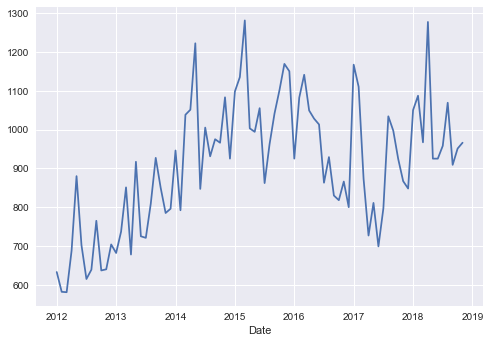

In [92]:
plt.style.use('seaborn')
df1 = df.groupby(['Date']).size()
df1.resample('M').max().plot()

<span style="color:darkblue">This shows that March 17, 2017 was the date that the most stops occured. We hypothesized that maybe Thanksgiving or Christmas Eve would be the day with the most violations due to drinking from holliday parties and increase in traveling. This result does still meet our hypothesis in a way since this was the date of St.Patrick's Day in 2017.

In [93]:
df['TimeOfStop'].value_counts().head()

23:30:00    2126
22:53:00    2115
23:00:00    2106
23:20:00    2091
22:57:00    2086
Name: TimeOfStop, dtype: int64

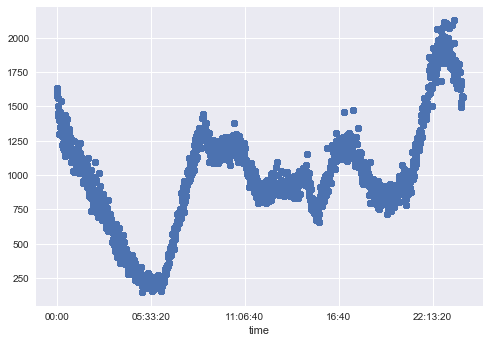

In [94]:
df.index.drop
df.set_index(pd.to_datetime(df['TimeOfStop'],format='%H:%M:%S').dt.time,drop=False,inplace=True)
df.index.name = 'Time'
df['GroupbyTime'] = df['TimeOfStop'].value_counts()
df.head()
plt.style.use('seaborn')
plt.plot_date(df['TimeOfStop'],df['GroupbyTime'])

<span style="color:darkblue">Our hypothesis that most violations might occur between the hours of 7 AM - 9 AM during people's morning work commutes, is not sup[ported by the data

In [10]:
data['SubAgency'].value_counts()

4th district, Wheaton                              352549
3rd district, Silver Spring                        281776
2nd district, Bethesda                             221730
6th district, Gaithersburg / Montgomery Village    183288
1st district, Rockville                            169176
5th district, Germantown                           162179
Headquarters and Special Operations                 46888
Name: SubAgency, dtype: int64

<span style="color:darkblue">The **4th district, Wheaton** sub-agency was responsible for the  most stops in the Montgomery County during those years in study.

<span style="color:darkblue">Use cartopy or ipyleaflet packages to draw the maps of the location. If these fail, use tableau to show the county map

<span style="color:darkblue"> Lists the traffic violation outcomes, if citation or warning.
The decision to give a warning or a citation is subjective and often at the discretion of the police officer - this couldlead us to analyze bias, but I'm not sure if we have all the data captured for doing this (we do have the gender and race breakdown)

In [24]:
data['Violation Type'].value_counts()

Warning     692599
Citation    652533
ESERO        69564
SERO           899
Name: Violation Type, dtype: int64

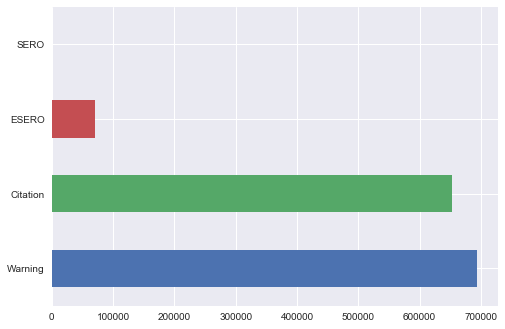

In [100]:
data['Violation Type'].value_counts().plot.barh()

<span style="color:darkblue">More warnings than citations</br>    
<font size="1">SERO - Safety Equipment Repair Order ESERO - Electronic Safety Equipment Repair Order</font>

In [23]:
data['Arrest Type'].value_counts()

A - Marked Patrol                         1008855
Q - Marked Laser                           120072
B - Unmarked Patrol                         38352
S - License Plate Recognition               13306
O - Foot Patrol                             11053
L - Motorcycle                              10711
E - Marked Stationary Radar                  8286
G - Marked Moving Radar (Stationary)         6591
R - Unmarked Laser                           5546
I - Marked Moving Radar (Moving)             2109
M - Marked (Off-Duty)                        1797
H - Unmarked Moving Radar (Stationary)        840
F - Unmarked Stationary Radar                 796
J - Unmarked Moving Radar (Moving)            398
C - Marked VASCAR                             396
P - Mounted Patrol                            315
D - Unmarked VASCAR                           278
N - Unmarked (Off-Duty)                       169
K - Aircraft Assist                            45
Name: Arrest Type, dtype: int64

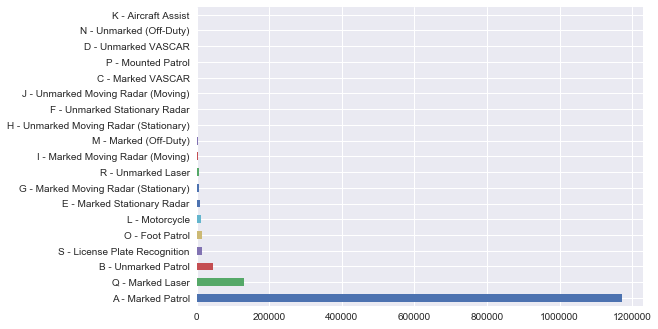

In [99]:
data['Arrest Type'].value_counts().plot.barh()

<span style="color:darkblue">Marked Patrol policing were the ones who caught almost all the violations

In [34]:
data['Gender'].value_counts()

M    950059
F    465859
U      1678
Name: Gender, dtype: int64

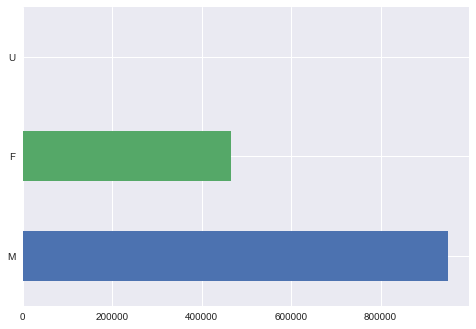

In [98]:
data['Gender'].value_counts().plot.barh()

<span style="color:darkblue"> Men offenders were more than double the number of women offenders

In [35]:
data['Race'].value_counts()

WHITE              505421
BLACK              448332
HISPANIC           301331
ASIAN               82927
OTHER               76520
NATIVE AMERICAN      3065
Name: Race, dtype: int64

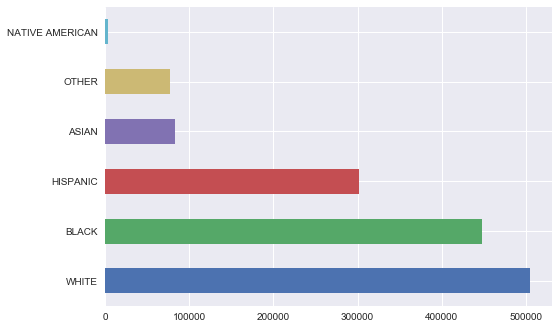

In [101]:
data['Race'].value_counts().plot.barh()

In [112]:
data.groupby(['Gender','Race']).size()

Gender  Race           
F       ASIAN               32054
        BLACK              151134
        HISPANIC            69245
        NATIVE AMERICAN       979
        OTHER               24506
        WHITE              187941
M       ASIAN               50864
        BLACK              297181
        HISPANIC           232047
        NATIVE AMERICAN      2083
        OTHER               50439
        WHITE              317445
U       ASIAN                   9
        BLACK                  17
        HISPANIC               39
        NATIVE AMERICAN         3
        OTHER                1575
        WHITE                  35
dtype: int64

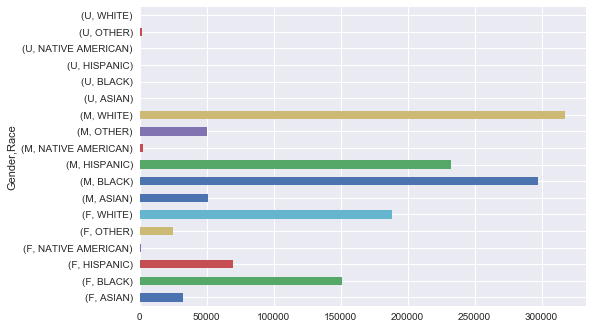

In [113]:
data.groupby(['Gender','Race']).size().plot.barh()

<span style="color:darkblue">Caucasian males recorded the highest number of violations, followed closely by african american males

In [156]:
data['Accident'].value_counts() #0
data['Belts'].value_counts()#46394
data['Alcohol'].value_counts() #2242
data['HAZMAT'].value_counts()  #127
data['Work Zone'].value_counts()#265
data['Work Zone'].value_counts()#265
data['Personal Injury'].value_counts()#16498
data['Property Damage'].value_counts()#27269
data['Fatal'].value_counts()#311

No     1417285
Yes        311
Name: Fatal, dtype: int64

<span style="color:darkblue">We now define 'citations per warning', the ratio of citations to warnings. A higher number signifies a greater likelihood of getting a tictcket instead of getting lucky and just escaping with a warning!

In [3]:
from ba500package.helper import citations_per_warning

In [4]:
data.groupby('Gender').apply(citations_per_warning)

,citations_per_warning
Gender,
F,0.756495
M,1.051159
U,0.156510


In [5]:
data.groupby('Race').apply(citations_per_warning)

,citations_per_warning
Race,
ASIAN,0.686614
BLACK,0.993312
HISPANIC,1.280722
NATIVE AMERICAN,0.814086
OTHER,0.718802
WHITE,0.823885


In [6]:
data.groupby(['Gender','Race']).apply(citations_per_warning)

citations_per_warning
Gender Race                                  
F      ASIAN                         0.599529
       BLACK                         0.823820
       HISPANIC                      0.889018
       NATIVE AMERICAN               0.576592
       OTHER                         0.647175
       WHITE                         0.707306
M      ASIAN                         0.747157
       BLACK                         1.091701
       HISPANIC                      1.432297
       NATIVE AMERICAN               0.952716
       OTHER                         0.787641
       WHITE                         0.901210
U      ASIAN                         1.666667
       BLACK                         2.400000
       HISPANIC                      1.466667
       NATIVE AMERICAN               1.000000
       OTHER                         0.124553
       WHITE                         0.521739

In [11]:
#from ipyleaflet import Marker
import ipyleaflet.marker as mark

center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = mark(location=center, draggable=False)
m.add_layer(mark);

m

ModuleNotFoundError: No module named 'ipyleaflet'

#### References

[1] http://strftime.org/

[2] http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

[3] https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

[4] https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts

[5] https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

In [96]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

ModuleNotFoundError: No module named 'cartopy'

In [158]:
data.iloc[0]

Agency                                                                   MCP
SubAgency                                        3rd district, Silver Spring
Description                DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...
Location                                                     8804 FLOWER AVE
Latitude                                                                 NaN
Longitude                                                                NaN
Accident                                                                  No
Belts                                                                     No
Personal Injury                                                           No
Property Damage                                                           No
Fatal                                                                     No
Commercial License                                                        No
HAZMAT                                                                    No

In [13]:
data[data['Alcohol']=='Yes'].head()

,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
Date Of Stop_Time Of Stop,,,,,,,,,,,,,,,,,,,,,
2017-08-30 19:55:00,MCP,"4th district, Wheaton",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-112(c),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-101(a),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(c),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(h),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"
2017-08-30 19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,No,No,...,16-303(d),Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)"


In [49]:
#data[data['Alcohol']=='Yes'].index
data.loc['2018-10-20 00:01:00',['SubAgency','Description','Accident','Belts','Personal Injury','Property Damage']]

,SubAgency,Description,Accident,Belts,Personal Injury,Property Damage
Date Of Stop_Time Of Stop,,,,,,
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village","DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A...",No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",DRIVING VEH. WHILE IMPAIRED BY ALCOHOL,No,No,No,Yes
2018-10-20 00:01:00,"6th district, Gaithersburg / Montgomery Village",FAILURE OF VEH. DRIVER TO STOP AFTER UNATTENDE...,No,No,No,Yes
